### Fraud Detection with supervised learning algorithms

Since it is all informations about credit card, it is sensitive data. The bank cannot provide detail about each columns except 3 columns (Time, Amount, and Class)
- Time: the time of transaction executed 
- Amount: amount of money as USD
- Class: (0: normal transaction | 1: fraud transaction)

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

### Loading dataset

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# dataset information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# missing value
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data exploration

In [6]:
X = df.iloc[:, 2:30].values # take all rows, from col2 to col30 (col30 is not include)
y = df.Class.values

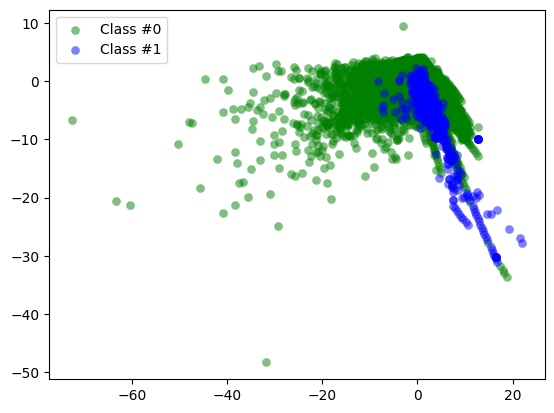

In [7]:
# Plot dataset to see it's pattern 
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15, c='g')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='b')
plt.legend()
plt.show()

In [8]:
# check to see the balance between normal transaction of fraud transaction
normal = round(df['Class'].value_counts()[0]/len(df)*100, 2)
fraud = round(df['Class'].value_counts()[1]/len(df)*100, 2)

print('nomal trasaction : ', normal, '%')
print('fraud trasaction : ', fraud, '%')

nomal trasaction :  99.83 %
fraud trasaction :  0.17 %


In [9]:
normal_tran = df[df['Class'] == 0]
frauds_tran = df[df['Class'] == 1]

In [10]:
# check to see statistical measure of nomal transaction amount 
normal_tran.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# check to see statistical measure of fraud transaction amount 
frauds_tran.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# Compare the the mean value of both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


1. We should note that there is far difference between the mean of fraud amount and normal amount. In addition, from col v1 to v28, there is opposite value between fraud and normal transaction (If the fraud value is positive, then normal value is negative, and vice versa). This case makes ML easy to define the pattern of fraud and normal transaction.

2. As we can see, the number of normal transactions is much more than fraud transaction. Thus, the dataset is highly imbalance between normal transaction and fraud transaction. Machine learning cannot produce the best model if the fitting dataset is imbalance. To balance dataset, there are two ways:
- Undersampling
- Oversampling

In this case we are going to use undersampling to balance dataset

### Data preparation

In [13]:
# Dealing with imbalance dataset: select 492 sample data from dataset
normal_sample = normal_tran.sample(n=492)
balance_data = pd.concat([normal_sample, frauds_tran], axis= 0)
balance_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

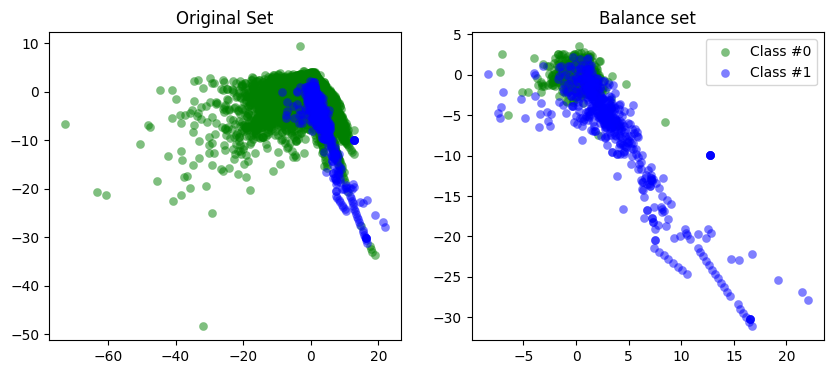

In [14]:
X_resampled = balance_data.iloc[:, 2:30].values
y_resampled = balance_data.Class.values

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15, c='g')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='b')
plt.title('Original Set')

plt.subplot(1, 2, 2)
plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15, c='g')
plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='b')
plt.title('Balance set')
plt.legend()
plt.show()

In [15]:
# Define input and targart data 
X = balance_data.drop(columns= 'Class', axis=1)
y = balance_data.Class

In [16]:
# Splite data for test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Model selection

In [17]:
# function to compare accuracty score
def ml_model(X_train, X_test, Y_train, Y_test):
    MLA = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB()]
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    row_index = 0
    for alg in MLA:
        predicted = alg.fit(X_train, Y_train).predict(X_test)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
        MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
        MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
        MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
        row_index+=1
    MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
    return MLA_compare
  
ml_model(X_train, X_test, y_train, y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.95,0.93,0.95,0.92,0.94
2,DecisionTreeClassifier,1.00,0.90,0.92,0.88,0.90
3,GaussianNB,0.86,0.84,0.99,0.69,0.81
1,KNeighborsClassifier,0.78,0.60,0.62,0.57,0.60


In [18]:
loreg_model = LogisticRegression()
loreg_model.fit(X_train, y_train)

logreg_y_pred = loreg_model.predict(X_test)

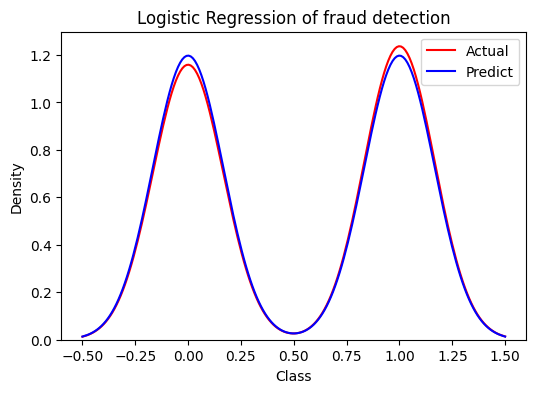

In [19]:
# Visualization of actual vs predict  
plt.figure(figsize = (6, 4))
ax1 = sns.distplot(y_test, hist = False, color = "r", label = "Actual")
sns.distplot(logreg_y_pred, hist = False, color = "b", label = "Predict", ax = ax1)
plt.title('Logistic Regression of fraud detection')
ax1.legend()
plt.show()